## Special Skript for the 20220412 emergence experiment

## Summerize Data

In [1]:
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.style import Style
from evaluation_scripts.oneway import OneWaySignificance
import matplotlib.pyplot as plt
import pandas as pd
import os


date = "20220412"
t_start = 4


experiment = Experiment(date)
Data = experiment.data[experiment.data.transfer_n >= t_start]
epsilon = 0.001

style = Style(figsize = (20,6), fontsize = 20)


<Figure size 1440x432 with 0 Axes>

## load expectations

In [2]:
exp = pd.read_pickle(os.path.join(experiment.pathes["obj"], "expectations_emergence.pkl"))

df = Data[Data.x.isin(["A&B"])].copy()
df["double"] = df.phenotype == "AB_r"
cols = ["strategy", "transfer_n", "double"]
summ = df[cols].groupby(cols[:-1]).sum().unstack().fillna(0).stack()
summ["f"] = summ/376
summary = summ.reset_index()

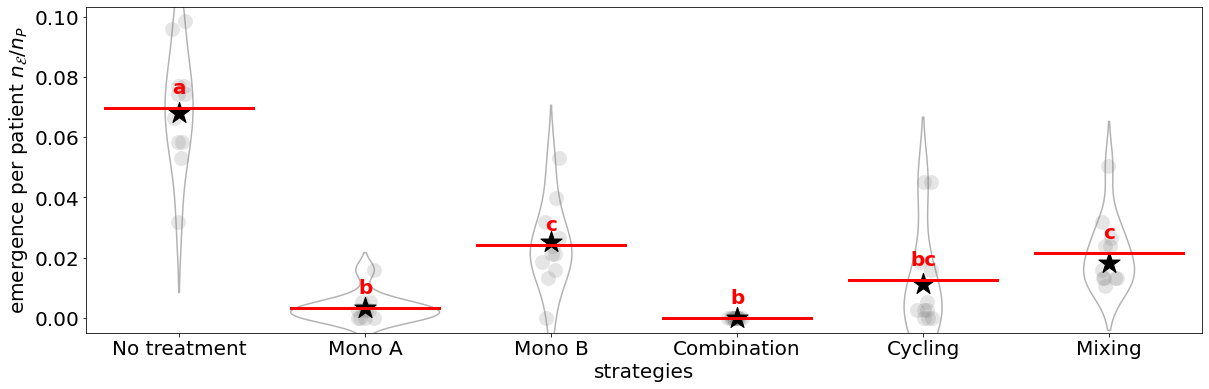

In [12]:
_, ax = style.create_figure_with_style()
emergence = OneWaySignificance(summary, "strategy", "f")
ax = emergence.plot(dot_color = "grey", strip = True,  order = experiment.strategies, ax = ax, jitter =.05)

ax.scatter(experiment.strategies, exp.loc[experiment.strategies, "f"], marker = "*", color = "black", s = 500)
ax.set_ylabel(r"emergence per patient $n_\mathcal{E}/n_P$")    
ax.set_xlabel("strategies")

plt.savefig(os.path.join(experiment.pathes["analysis"], "f_emergence_anova.pdf"), format='pdf', dpi = 300)
emergence.write_anova_results(os.path.join(experiment.pathes["tables"], "emergence_anova.tex"))
emergence.write_tukey_results(os.path.join(experiment.pathes["tables"], "emergence_tukey.tex"))

In [5]:
exp

,f
No treatment,0.068075
Mono A,0.003213
Mono B,0.025131
Mixing,0.018244
Combination,0.000000
Cycling,0.011407
